## IS 362 Week 13 Assignment
### Alexander Doler

In this first cell we import the necesary libraries, as well as the dataset to be used. While importing the dataset, we specify the separator used to identify the columns, as well as which columns to import and their names.

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mushroomData = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,5,9,22], names=["Edibility","Odor","Color","Habitat"])
mushroomData 


,Edibility,Odor,Color,Habitat
0,p,p,k,u
1,e,a,k,g
2,e,l,n,m
3,p,p,n,u
4,e,n,k,g
5,e,a,n,g
6,e,a,g,m
7,e,l,n,m
8,p,p,p,g
9,e,a,g,m


The algorithm below iterates over the entire dataframe and converts the letters into numbers, which will be necessary for further analysis later on. The algorithm works by checking whether an entry exists in a column, assigning new entries a number, and then replacing all instances of such entries with the assigned number. The count starts over at 0 with each column. Additionaly funcutionaly which may be added for further downstream analysis is the creation of a unique dictionary for each column, which may be used to easily translate a look up the original meaning of the numeric values.

In [15]:
columns = [mushroomData.Edibility,mushroomData.Odor,mushroomData.Color,mushroomData.Habitat]
columnNames = ["Edibility","Odor","Color","Habitat"]
transDict = {}
counter = 0
columnCounter = 0
columnNamesCounter = 0
mushroomDataNums = pd.DataFrame()

for n in range(4):
    for letter in columns[columnCounter]:
        if letter not in transDict:
            transDict[letter] = counter
            counter += 1

    oldValues = list(transDict.keys())
    newValues = list(transDict.values())
    
    mushroomDataNums[columnCounter] = mushroomData[[columnNamesCounter]].replace(oldValues,newValues)
    
    columnCounter += 1
    columnNamesCounter += 1
    counter = 0
    transDict = {}
    
mushroomDataNums.columns = columnNames
mushroomDataNums

,Edibility,Odor,Color,Habitat
0,0,0,0,0
1,1,1,0,1
2,1,2,1,2
3,0,0,1,0
4,1,3,0,1
5,1,1,1,1
6,1,1,2,2
7,1,2,1,2
8,0,0,3,1
9,1,1,2,2


In the following four cells, we use Matplolib to produce car charts for each of the four columns in the dataframe. The bar charts compare the count of each unique attribute. For example, the first chart shows the amount of poisenous vs edible mushrooms. 0 represents poisenous mushrooms and 1 represents edible mushrooms. As we can see, there are slightly more edible mushrooms than there are poisenous ones, although the ratio is nearly 50-50. Those are not very good odds if you need to guess which mushrooms to eat in the wild!

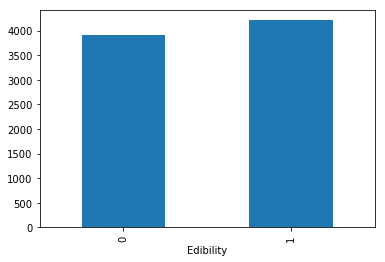

In [10]:
mplotEdibility = mushroomDataNums.groupby("Edibility").size()
mplotEdibility.plot(kind="bar")


Regarding odor, the highest, 3/odorless most likely has little to do with whether a mushroom is edible or poisenous. However, it is my hypothesis at this stage that other factors, such as 4/foul odor, will in fact tend to indicate the edibility of a mushroom.

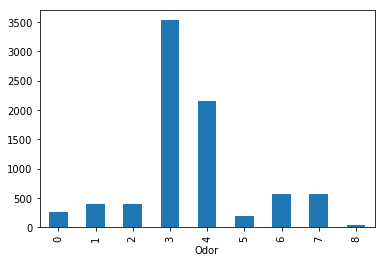

In [11]:
mplotOdor = mushroomDataNums.groupby("Odor").size()
mplotOdor.plot(kind="bar")

As for the remaining two columns gill color and habitat, I believe we will see some general trends with regard to edibility/poisenous, but no clear indicators.

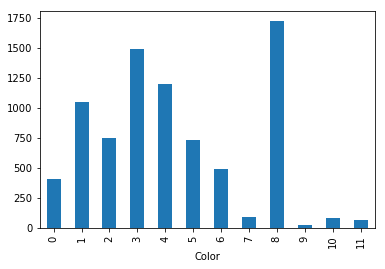

In [12]:
mplotColor = mushroomDataNums.groupby("Color").size()
mplotColor.plot(kind="bar")

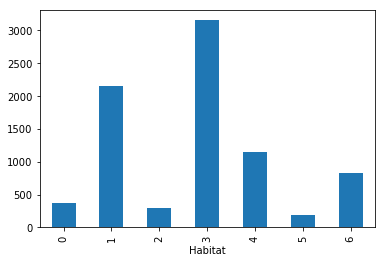

In [13]:
mplotHabitat = mushroomDataNums.groupby("Habitat").size()
mplotHabitat.plot(kind="bar")